In [3]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
import apache_log_parser
from pprint import pprint
import sys
# import apachelog, sys

# Assignment 1: Web Server Log Analysis

Before we begin, make sure you have the following files:

    data/NASA_access_log_Jul95
    data/GeoIP.dat

## Part 1: Load and parse the data


For this part, you will load the data and store them in as a **list of python dictionaries**. Here are the first few lines of the log file.

```
199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
```

Below is an example formatting string and a short description of each element:
    
    format = r'%h %l %u %t \"%r\" %>s %b'
    
where

    %h          - remote host (ie the client IP)
    %l          - identity of the user determined by identd (not usually used since not reliable)
    %u          - user name determined by HTTP authentication
    %t          - time the server finished processing the request.
    %r          - request line from the client. ("GET / HTTP/1.0")
    %>s         - status code sent from the server to the client (200, 404 etc.)
    %b          - size of the response to the client (in bytes)
    

Remember we want the data to be a *list of dictionaries* as shown below:

    data = [
    {'%>s': '200',
     '%b': '6245',
     '%h': '199.72.81.55',
     '%l': '-',
     '%r': 'GET /history/apollo/ HTTP/1.0',
     '%t': '[01/Jul/1995:00:00:01 -0400]',
     '%u': '-'},
    {'%>s': '200',
     '%b': '3985',
     '%h': 'unicomp6.unicomp.net',
     '%l': '-',
     '%r': 'GET /shuttle/countdown/ HTTP/1.0',
     '%t': '[01/Jul/1995:00:00:06 -0400]',
     '%u': '-'},
     ...
    ]


### Remarks 
 - There are some log entries that are malformed. You may ignore them.
 - This Python package can be useful: `conda install -c auto apache-log-parser=1.3.0`
 

In [4]:
# Fill code here
fformat = '%h %l %u %t \"%r\" %>s %b'
line_parser = apache_log_parser.make_parser(fformat)
# log = open('data/NASA_access_log_Jul95').readlines()
# print log
# sample_string = '199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245'
# print len(log)
sample_string = '199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245'
log_line_data = line_parser(sample_string)
pprint(log_line_data)
# log_line_data



{'remote_host': '199.72.81.55',
 'remote_logname': '-',
 'remote_user': '-',
 'request_first_line': 'GET /history/apollo/ HTTP/1.0',
 'request_http_ver': '1.0',
 'request_method': 'GET',
 'request_url': '/history/apollo/',
 'request_url_fragment': '',
 'request_url_hostname': None,
 'request_url_netloc': '',
 'request_url_password': None,
 'request_url_path': '/history/apollo/',
 'request_url_port': None,
 'request_url_query': '',
 'request_url_query_dict': {},
 'request_url_query_list': [],
 'request_url_query_simple_dict': {},
 'request_url_scheme': '',
 'request_url_username': None,
 'response_bytes_clf': '6245',
 'status': '200',
 'time_received': '[01/Jul/1995:00:00:01 -0400]',
 'time_received_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 1),
 'time_received_isoformat': '1995-07-01T00:00:01',
 'time_received_tz_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 1, tzinfo='0400'),
 'time_received_tz_isoformat': '1995-07-01T00:00:01-04:00',
 'time_received_utc_datetimeobj': datet

In [5]:
fformat = '%h %l %u %t \"%r\" %>s %b'
log = open('data/NASA_access_log_Jul95').readlines()
# log = log[:1000]
print "len(log)", len(log)
# line_parser = apache_log_parser.make_parser(fformat)
# fformat = ' %h %l %u %t \"%r\" %>s %b '
# log_line_data = line_parser('199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245')

# pprint(log_line_data)
line_parser = apache_log_parser.make_parser(fformat)
ans_log =[]
# for i in log:
#     print i
for i in log:
    
#     data = line_parser(i)
#     ans_log.append(data)
#     print ans_log
    try:
#         print i
        data = line_parser(i)
    except:
        continue
    ans_log.append(data)
    
# ans_log[:2]
        


len(log) 1891715


In [6]:
ans_log[:2]

[{'remote_host': '199.72.81.55',
  'remote_logname': '-',
  'remote_user': '-',
  'request_first_line': 'GET /history/apollo/ HTTP/1.0',
  'request_http_ver': '1.0',
  'request_method': 'GET',
  'request_url': '/history/apollo/',
  'request_url_fragment': '',
  'request_url_hostname': None,
  'request_url_netloc': '',
  'request_url_password': None,
  'request_url_path': '/history/apollo/',
  'request_url_port': None,
  'request_url_query': '',
  'request_url_query_dict': {},
  'request_url_query_list': [],
  'request_url_query_simple_dict': {},
  'request_url_scheme': '',
  'request_url_username': None,
  'response_bytes_clf': '6245',
  'status': '200',
  'time_received': '[01/Jul/1995:00:00:01 -0400]',
  'time_received_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 1),
  'time_received_isoformat': '1995-07-01T00:00:01',
  'time_received_tz_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 1, tzinfo='0400'),
  'time_received_tz_isoformat': '1995-07-01T00:00:01-04:00',
  'time_recei

In [7]:
# Expected output
data[:2]

[{'%>s': '200',
  '%b': '6245',
  '%h': '199.72.81.55',
  '%l': '-',
  '%r': 'GET /history/apollo/ HTTP/1.0',
  '%t': '01/Jul/1995 00:00:01 -0400',
  '%u': '-'},
 {'%>s': '200',
  '%b': '3985',
  '%h': 'unicomp6.unicomp.net',
  '%l': '-',
  '%r': 'GET /shuttle/countdown/ HTTP/1.0',
  '%t': '01/Jul/1995 00:00:06 -0400',
  '%u': '-'}]

## Part 2: Create the Data Frame

In this part, we will create a data frame from `data` and clean it up a little bit. First, create a data frame called `df` from `data`

In [7]:
# Fill code here
df = DataFrame(ans_log)

Now, show the first two line of `df`

In [8]:
# Fill code here
df[:2]

remote_host remote_logname remote_user  \
0          199.72.81.55              -           -   
1  unicomp6.unicomp.net              -           -   

                 request_first_line request_http_ver request_method  \
0     GET /history/apollo/ HTTP/1.0              1.0            GET   
1  GET /shuttle/countdown/ HTTP/1.0              1.0            GET   

           request_url request_url_fragment request_url_hostname  \
0     /history/apollo/                                      None   
1  /shuttle/countdown/                                      None   

  request_url_netloc             ...              request_url_username  \
0                                ...                               NaN   
1                                ...                               NaN   

  response_bytes_clf  status                 time_received  \
0               6245     200  [01/Jul/1995:00:00:01 -0400]   
1               3985     200  [01/Jul/1995:00:00:06 -0400]   

  time_received_datetimeobj time_received_isoformat  \
0       1995-07-01 00:00:01     1995-07-01T00:00:01   
1       1995-07-01 00:00:06     1995-07-01T00:00:06   

  time_received_tz_datetimeobj time_received_tz_isoformat  \
0    1995-07-01 00:00:01-04:00  1995-07-01T00:00:01-04:00   
1    1995-07-01 00:00:06-04:00  1995-07-01T00:00:06-04:00   

   time_received_utc_datetimeobj time_received_utc_isoformat  
0      1995-07-01 04:00:01+00:00   1995-07-01T04:00:01+00:00  
1      1995-07-01 04:00:06+00:00   1995-07-01T04:00:06+00:00  

[2 rows x 28 columns]

In [13]:
# Expected output

Status     b                    IP %l                           Request  \
0    200  6245          199.72.81.55  -     GET /history/apollo/ HTTP/1.0   
1    200  3985  unicomp6.unicomp.net  -  GET /shuttle/countdown/ HTTP/1.0   

                         Time %u  
0  01/Jul/1995 00:00:01 -0400  -  
1  01/Jul/1995 00:00:06 -0400  -

In [9]:
df = df[['status', 'response_bytes_clf', 'remote_host','request_first_line','time_received_datetimeobj']]
# df = df[['status']]


df = df.rename(columns={'status': 'Status', 'response_bytes_clf':'b', 
                        'remote_host':'IP', 'request_first_line':'Request',
                        'time_received_datetimeobj': 'Time'})
# df = df.rename(rename['Status', 'b', 'IP', '%l', 'Request', 'Time', '%u'])


# df['response_bytes_clf']

Rename the columns to `Status`, `b`, `IP`, `Request`, and `Time`. Remove all other columns.

In [10]:
df.head()

Status     b                    IP  \
0    200  6245          199.72.81.55   
1    200  3985  unicomp6.unicomp.net   
2    200  4085        199.120.110.21   
3    304     0    burger.letters.com   
4    200  4179        199.120.110.21   

                                             Request                Time  
0                      GET /history/apollo/ HTTP/1.0 1995-07-01 00:00:01  
1                   GET /shuttle/countdown/ HTTP/1.0 1995-07-01 00:00:06  
2  GET /shuttle/missions/sts-73/mission-sts-73.ht... 1995-07-01 00:00:09  
3       GET /shuttle/countdown/liftoff.html HTTP/1.0 1995-07-01 00:00:11  
4  GET /shuttle/missions/sts-73/sts-73-patch-smal... 1995-07-01 00:00:11

In [16]:
# Expected output

IP                                            Request  \
0          199.72.81.55                      GET /history/apollo/ HTTP/1.0   
1  unicomp6.unicomp.net                   GET /shuttle/countdown/ HTTP/1.0   
2        199.120.110.21  GET /shuttle/missions/sts-73/mission-sts-73.ht...   
3    burger.letters.com       GET /shuttle/countdown/liftoff.html HTTP/1.0   
4        199.120.110.21  GET /shuttle/missions/sts-73/sts-73-patch-smal...   

  Status                        Time     b  
0    200  01/Jul/1995 00:00:01 -0400  6245  
1    200  01/Jul/1995 00:00:06 -0400  3985  
2    200  01/Jul/1995 00:00:09 -0400  4085  
3    304  01/Jul/1995 00:00:11 -0400     0  
4    200  01/Jul/1995 00:00:11 -0400  4179

Next, Convert Time column to datetime format and make an index out of it. Use `pd.to_datetime()`

In [11]:
# Fill code here
# df.drop('Time', axis=1).head()
# df.index = pd.to_datetime(df.pop('Time'))
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index(['Time'])

df.head()


# df.index = pd.to_datetime(df.pop('Time'))

Status     b                    IP  \
Time                                                     
1995-07-01 00:00:01    200  6245          199.72.81.55   
1995-07-01 00:00:06    200  3985  unicomp6.unicomp.net   
1995-07-01 00:00:09    200  4085        199.120.110.21   
1995-07-01 00:00:11    304     0    burger.letters.com   
1995-07-01 00:00:11    200  4179        199.120.110.21   

                                                               Request  
Time                                                                    
1995-07-01 00:00:01                      GET /history/apollo/ HTTP/1.0  
1995-07-01 00:00:06                   GET /shuttle/countdown/ HTTP/1.0  
1995-07-01 00:00:09  GET /shuttle/missions/sts-73/mission-sts-73.ht...  
1995-07-01 00:00:11       GET /shuttle/countdown/liftoff.html HTTP/1.0  
1995-07-01 00:00:11  GET /shuttle/missions/sts-73/sts-73-patch-smal...

Change `Status` variable to type `int`. Use `.astype()`

In [12]:
# Fill code here
df['Status'] = df['Status'].astype('int')
# df.head()


Your data frame should have the following format

In [32]:
# DO NOT CHANGE/RERUN
# df.head()

Status     b                    IP  \
Time                                                      
1995-07-01 04:00:01     200  6245          199.72.81.55   
1995-07-01 04:00:06     200  3985  unicomp6.unicomp.net   
1995-07-01 04:00:09     200  4085        199.120.110.21   
1995-07-01 04:00:11     304     0    burger.letters.com   
1995-07-01 04:00:11     200  4179        199.120.110.21   

                                                               Request  
Time                                                                    
1995-07-01 04:00:01                      GET /history/apollo/ HTTP/1.0  
1995-07-01 04:00:06                   GET /shuttle/countdown/ HTTP/1.0  
1995-07-01 04:00:09  GET /shuttle/missions/sts-73/mission-sts-73.ht...  
1995-07-01 04:00:11       GET /shuttle/countdown/liftoff.html HTTP/1.0  
1995-07-01 04:00:11  GET /shuttle/missions/sts-73/sts-73-patch-smal...

Some of the rows in the *b* column contain '-' string, so we can't convert them with *astype*. We can apply a custom function to this column, that will convert all dashes to NaN, and the rest to floats, additionally converting from bytes to megabytes:

In [13]:
def dash2nan(x):
    if x == '-':
        x = np.nan
    else:
        x = float(x)/1048576.
    return x

Apply the above fuction to `b` column of `df`. Try using `.apply()`

In [14]:
# Fill code here
df['b'] = df['b'].apply(dash2nan)
df.head()

Status         b                    IP  \
Time                                                          
1995-07-01 00:00:01     200  0.005956          199.72.81.55   
1995-07-01 00:00:06     200  0.003800  unicomp6.unicomp.net   
1995-07-01 00:00:09     200  0.003896        199.120.110.21   
1995-07-01 00:00:11     304  0.000000    burger.letters.com   
1995-07-01 00:00:11     200  0.003985        199.120.110.21   

                                                               Request  
Time                                                                    
1995-07-01 00:00:01                      GET /history/apollo/ HTTP/1.0  
1995-07-01 00:00:06                   GET /shuttle/countdown/ HTTP/1.0  
1995-07-01 00:00:09  GET /shuttle/missions/sts-73/mission-sts-73.ht...  
1995-07-01 00:00:11       GET /shuttle/countdown/liftoff.html HTTP/1.0  
1995-07-01 00:00:11  GET /shuttle/missions/sts-73/sts-73-patch-smal...

Now our data frame is ready!

## Part 3: Traffic analysis

First, plot the response size over time from 9am to 10am on Jul 13, 1995. Similar to the following plot:

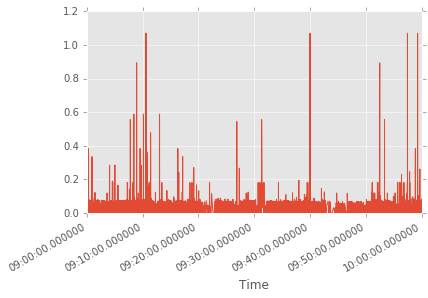

In [15]:
# Fill code here
# df['1995-07-13 9:00':'1995-07-13 10:00'].plot()

# df['b'].plot()
# df['b'].plot()

s = '1995-07-13 9:00' <= df.index
e = df.index <= '1995-07-13 10:00'
plot_data = np.logical_and(s,e)
new_df = df[plot_data]
# print new_df
new_df.plot(y='b', legend=False)

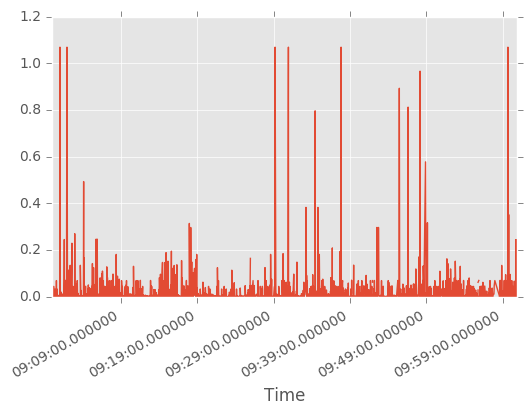

In [37]:
# Expected output

Next, use `.resample()` along with `.sum()` to resample the data and plot the traffic over time for all days. Use '10T' (every 10 minutes) as the sampling rate.

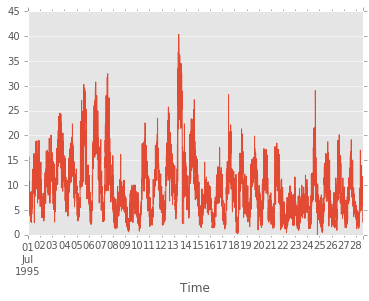

In [16]:
# Fill code here
res_data = df.resample('10t').sum()
res_data.plot(y='b', legend=False)

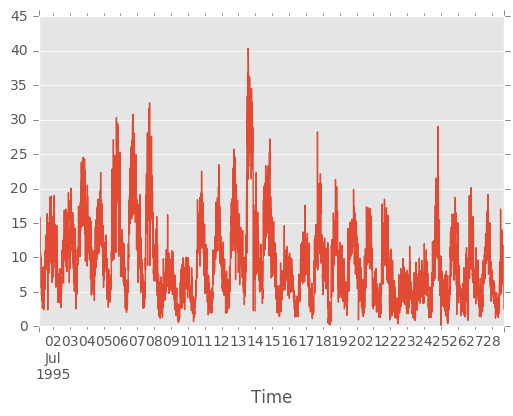

In [25]:
# Expected output

Now try to zoom into 13 Jul 1995.

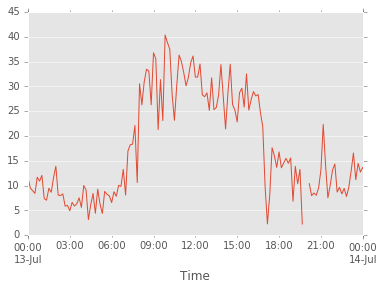

In [17]:
# Fill code here
res_data.plot(y='b', legend=False, xlim= ('1995-07-13', '1995-07-14'))


# res_data.set_xlim(pd.Timestamp('1995-07-13'))
# plt.set_xlim('1995-07-13')

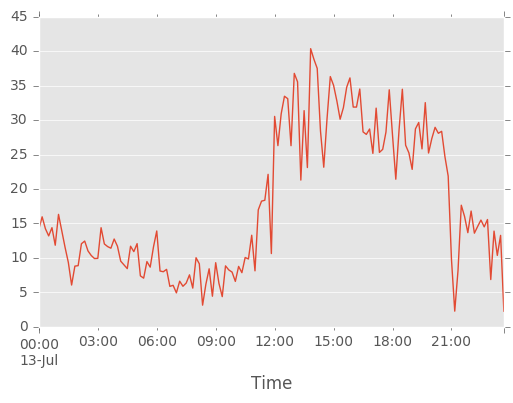

In [27]:
# Expected output

In [18]:
# Fill code here
df[df['b']>3]

Status         b                     IP  \
Time                                                           
1995-07-07 10:28:56     200  3.009318         spider.tbe.com   
1995-07-07 14:03:32     200  6.507812                  derec   
1995-07-09 09:22:14     200  3.009318        netspace.net.au   
1995-07-13 14:38:43     200  3.009318           acf4.nyu.edu   
1995-07-14 09:11:29     200  3.009318           163.206.89.4   
1995-07-17 13:31:01     200  3.009318  jcj8363.dukepower.com   
1995-07-22 13:08:18     200  3.009318      wuzza.harvard.edu   
1995-07-25 17:58:56     200  3.009318         198.122.135.40   

                                                               Request  
Time                                                                    
1995-07-07 10:28:56  GET /statistics/1995/bkup/Mar95_full.html HTTP...  
1995-07-07 14:03:32  GET /shuttle/countdown/video/livevideo.jpeg HT...  
1995-07-09 09:22:14  GET /statistics/1995/bkup/Mar95_full.html HTTP...  
1995-07-13 14:38:43  GET /statistics/1995/bkup/Mar95_full.html   HT...  
1995-07-14 09:11:29  GET /statistics/1995/bkup/Mar95_full.html HTTP...  
1995-07-17 13:31:01  GET /statistics/1995/bkup/Mar95_full.html   HT...  
1995-07-22 13:08:18  GET /statistics/1995/bkup/Mar95_full.html   HT...  
1995-07-25 17:58:56  GET /statistics/1995/bkup/Mar95_full.html   HT...

Let's find out large requests. Show requests that has response biggger than 3MB.

In [28]:
# Expected output

IP  \
Time                                         
1995-07-07 14:28:56         spider.tbe.com   
1995-07-07 18:03:32                  derec   
1995-07-09 13:22:14        netspace.net.au   
1995-07-13 18:38:43           acf4.nyu.edu   
1995-07-14 13:11:29           163.206.89.4   
1995-07-17 17:31:01  jcj8363.dukepower.com   
1995-07-22 17:08:18      wuzza.harvard.edu   
1995-07-25 21:58:56         198.122.135.40   

                                                               Request  \
Time                                                                     
1995-07-07 14:28:56  GET /statistics/1995/bkup/Mar95_full.html HTTP...   
1995-07-07 18:03:32  GET /shuttle/countdown/video/livevideo.jpeg HT...   
1995-07-09 13:22:14  GET /statistics/1995/bkup/Mar95_full.html HTTP...   
1995-07-13 18:38:43  GET /statistics/1995/bkup/Mar95_full.html   HT...   
1995-07-14 13:11:29  GET /statistics/1995/bkup/Mar95_full.html HTTP...   
1995-07-17 17:31:01  GET /statistics/1995/bkup/Mar95_full.html   HT...   
1995-07-22 17:08:18  GET /statistics/1995/bkup/Mar95_full.html   HT...   
1995-07-25 21:58:56  GET /statistics/1995/bkup/Mar95_full.html   HT...   

                     Status         b  
Time                                   
1995-07-07 14:28:56     200  3.009318  
1995-07-07 18:03:32     200  6.507812  
1995-07-09 13:22:14     200  3.009318  
1995-07-13 18:38:43     200  3.009318  
1995-07-14 13:11:29     200  3.009318  
1995-07-17 17:31:01     200  3.009318  
1995-07-22 17:08:18     200  3.009318  
1995-07-25 21:58:56     200  3.009318

what is the typical size of the server's response? Make a histogram of response sizes smaller than 3MB. Set number of bins to 10.

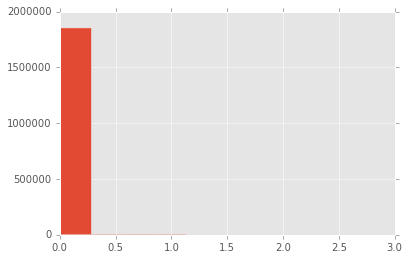

In [19]:
# Fill code here
sm = df['b']<3
new_his = df[sm]
new_his.b.hist(bins=10)

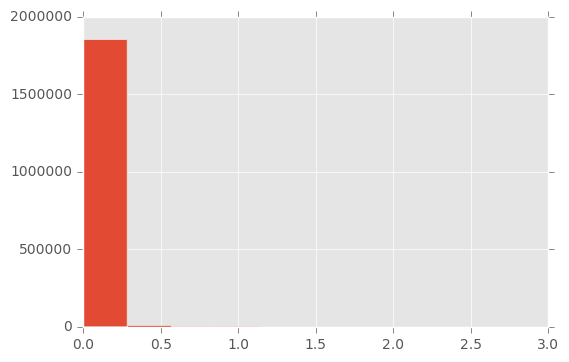

In [33]:
# Expected output

So most of the files are less than 0.5 MB large. In fact they are even smaller. Show a histogram of responses sizes smaller than 0.05 MB. Set number of bins to 30.

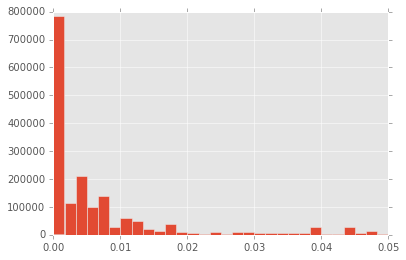

In [20]:
# Fill code here
sm = df['b']<0.05
new_his = df[sm]
new_his.b.hist(bins=30)

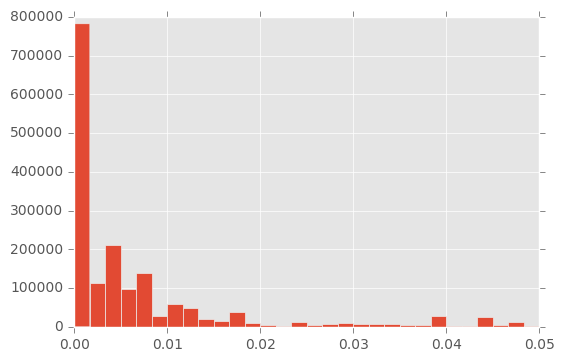

In [34]:
# Expected output

Very small responses can be all kinds of stuff, but larger ones are probably some relatively big files. Let's have a look at histogram of response sizes between 0.2 and 0.25 MB. Set number of bins to 100.

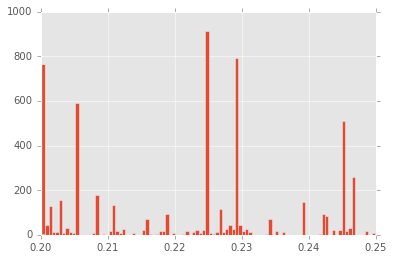

In [21]:
# Fill code here
a = df['b']>0.2
b = df['b']<0.25
sm = np.logical_and(a,b)
new_his = df[sm]
new_his.b.hist(bins=100)

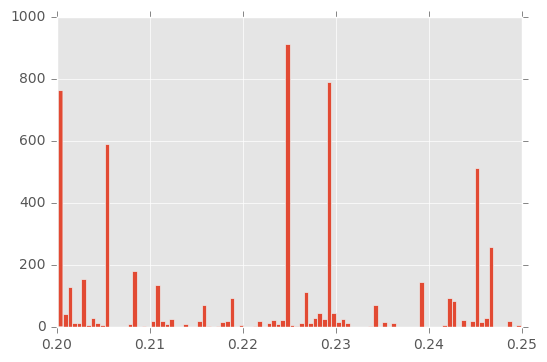

In [35]:
# Expected output

We now can locate the size of the file more precisely, and find out their names. Show the entries that have response size between 0.22 and 0.224 MB.

In [22]:
# Fill code here
a = df['b']>0.22
b = df['b']<0.224
sm = np.logical_and(a,b)

df[sm].head()

Status         b                    IP  \
Time                                                          
1995-07-01 08:39:58     200  0.223356        131.182.28.171   
1995-07-02 11:17:25     200  0.223778        landon.iag.net   
1995-07-02 15:14:26     200  0.223009  www-d3.proxy.aol.com   
1995-07-02 15:20:21     200  0.223356  www-d3.proxy.aol.com   
1995-07-03 00:45:50     200  0.223356  atropos.jf.intel.com   

                                                               Request  
Time                                                                    
1995-07-01 08:39:58  GET /shuttle/missions/sts-51/sts-51-patch.jpg ...  
1995-07-02 11:17:25  GET /news/sci.space.news/archive/sci-space-new...  
1995-07-02 15:14:26  GET /shuttle/missions/sts-50/sts-50-patch.jpg ...  
1995-07-02 15:20:21  GET /shuttle/missions/sts-51/sts-51-patch.jpg ...  
1995-07-03 00:45:50  GET /shuttle/missions/sts-51/sts-51-patch.jpg ...

In [36]:
# Expected output

IP  \
Time                                        
1995-07-01 12:39:58        131.182.28.171   
1995-07-02 15:17:25        landon.iag.net   
1995-07-02 19:14:26  www-d3.proxy.aol.com   
1995-07-02 19:20:21  www-d3.proxy.aol.com   
1995-07-03 04:45:50  atropos.jf.intel.com   

                                                               Request  \
Time                                                                     
1995-07-01 12:39:58  GET /shuttle/missions/sts-51/sts-51-patch.jpg ...   
1995-07-02 15:17:25  GET /news/sci.space.news/archive/sci-space-new...   
1995-07-02 19:14:26  GET /shuttle/missions/sts-50/sts-50-patch.jpg ...   
1995-07-02 19:20:21  GET /shuttle/missions/sts-51/sts-51-patch.jpg ...   
1995-07-03 04:45:50  GET /shuttle/missions/sts-51/sts-51-patch.jpg ...   

                     Status         b  
Time                                   
1995-07-01 12:39:58     200  0.223356  
1995-07-02 15:17:25     200  0.223778  
1995-07-02 19:14:26     200  0.223009  
1995-07-02 19:20:21     200  0.223356  
1995-07-03 04:45:50     200  0.223356

## Part 4 : Server status codes

I would like to know how different server responses are distributed through time. Create a new Data Frame that counts the number of requests per status in every 2 hour time spans.

```
HTTP Status Code
----------------
200 - OK
302 - Found
304 - Not Modified
400 - Bad Request
403 - Forbidden 
404 - Not Found
500 - Internal Server Error
501 - Not Implemented
```

In [23]:
# Fill code here
time_span = '2H'
df200 = df['Status'][df['Status'] == 200].resample(time_span, how='count')
df302 = df['Status'][df['Status'] == 302].resample(time_span, how='count')
df304 = df['Status'][df['Status'] == 304].resample(time_span, how='count')
df400 = df['Status'][df['Status'] == 400].resample(time_span, how='count')
df403 = df['Status'][df['Status'] == 403].resample(time_span, how='count')
df404 = df['Status'][df['Status'] == 404].resample(time_span, how='count')
df500 = df['Status'][df['Status'] == 500].resample(time_span, how='count')
df501 = df['Status'][df['Status'] == 501].resample(time_span, how='count')

new_status_df = DataFrame({'Bad Request':df400,'Forbidden':df403,'Found':df302,'Internal Server Error':df500,'Not Found':df404,'Not Implemented':df501, 'Not Modified':df304, 'OK':df200,})
new_status_df.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Fra

Bad Request  Forbidden  Found  Internal Server Error  \
Time                                                                        
1995-07-01 00:00:00          NaN        NaN    292                    NaN   
1995-07-01 02:00:00          NaN        NaN    135                    NaN   
1995-07-01 04:00:00          NaN        NaN     91                    NaN   
1995-07-01 06:00:00          NaN        NaN    134                    NaN   
1995-07-01 08:00:00          NaN        NaN    153                    NaN   

                     Not Found  Not Implemented  Not Modified    OK  
Time                                                                 
1995-07-01 00:00:00         34              NaN           328  5915  
1995-07-01 02:00:00         28              NaN           236  3603  
1995-07-01 04:00:00         19              NaN           198  2517  
1995-07-01 06:00:00          6              NaN           261  2684  
1995-07-01 08:00:00          9              NaN           296  3565

In [44]:
# Expected output

Bad Request  Forbidden  Found  Internal Server Error  \
Time                                                                        
1995-07-01 04:00:00          NaN        NaN    292                    NaN   
1995-07-01 06:00:00          NaN        NaN    135                    NaN   
1995-07-01 08:00:00          NaN        NaN     91                    NaN   
1995-07-01 10:00:00          NaN        NaN    134                    NaN   
1995-07-01 12:00:00          NaN        NaN    153                    NaN   

                     Not Found  Not Implemented  Not Modified    OK  
Time                                                                 
1995-07-01 04:00:00         34              NaN           328  5915  
1995-07-01 06:00:00         28              NaN           236  3603  
1995-07-01 08:00:00         19              NaN           198  2517  
1995-07-01 10:00:00          6              NaN           261  2684  
1995-07-01 12:00:00          9              NaN           296  3565

We plot all values at once:

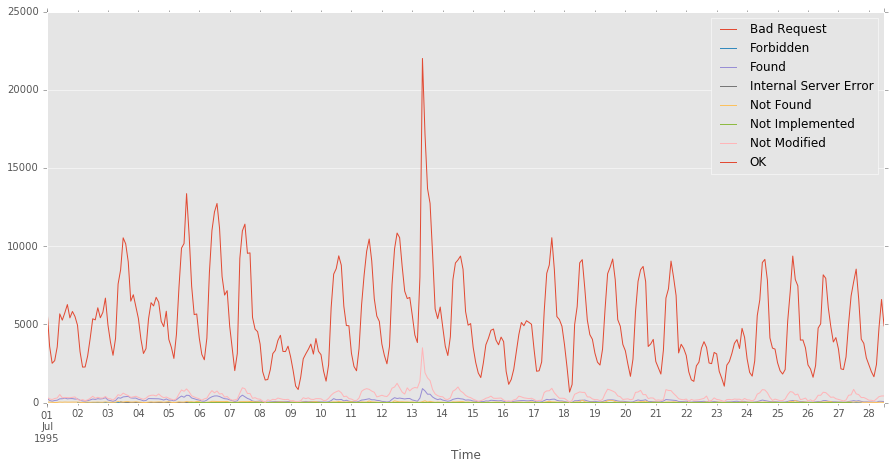

In [24]:
# Fill code here
new_status_df.plot(figsize=(15, 7))

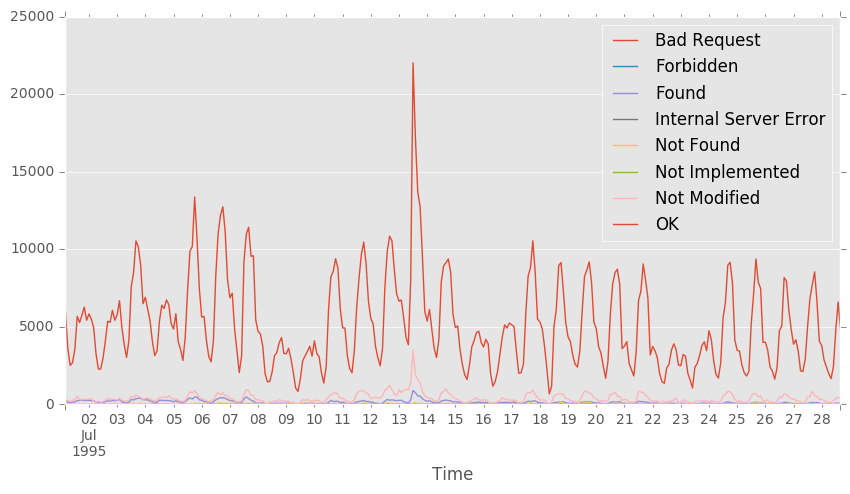

In [46]:
# Expected output

Show only Error and Redirection status codes as a stacked plot. You should show daily data. Use `.plot(kind='barh',stacked=True,figsize=(10,7))`

In [25]:
time_span = 'D'
df302 = df['Status'][df['Status'] == 302].resample(rule='D', how='count')
df304 = df['Status'][df['Status'] == 304].resample(rule='D', how='count')
df400 = df['Status'][df['Status'] == 400].resample(rule='D', how='count')
df403 = df['Status'][df['Status'] == 403].resample(rule='D', how='count')
df404 = df['Status'][df['Status'] == 404].resample(rule='D', how='count')
df500 = df['Status'][df['Status'] == 500].resample(rule='D', how='count')
df501 = df['Status'][df['Status'] == 501].resample(rule='D', how='count')
only_Error_and_Redirection_status_df = DataFrame({'Bad Request':df400,'Forbidden':df403,'Found':df302,'Internal Server Error':df500,'Not Found':df404,'Not Implemented':df501,'Not Modified':df304})
only_Error_and_Redirection_status_df.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new synt

Bad Request  Forbidden  Found  Internal Server Error  Not Found  \
Time                                                                          
1995-07-01          NaN        NaN   2568                    NaN        316   
1995-07-02          NaN        5.0   2370                    NaN        291   
1995-07-03          NaN        2.0   3122                   53.0        474   
1995-07-04          NaN        4.0   2513                    0.0        359   
1995-07-05          NaN        2.0   3349                    0.0        497   

            Not Implemented  Not Modified  
Time                                       
1995-07-01              NaN          3797  
1995-07-02              NaN          3107  
1995-07-03              NaN          4582  
1995-07-04              NaN          4507  
1995-07-05              1.0          5646

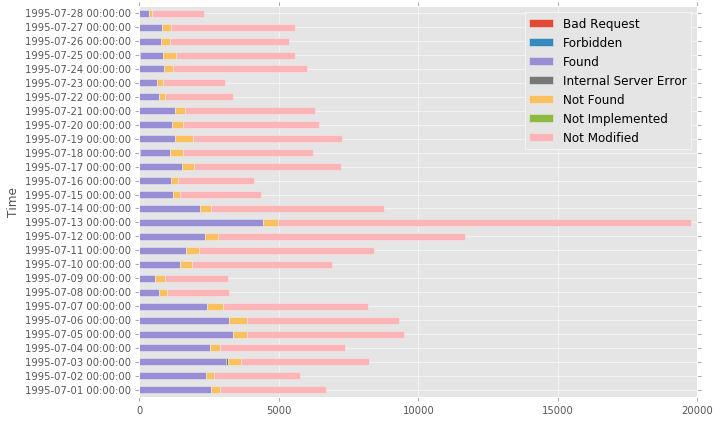

In [26]:
# Fill code here
# Fill code here

only_Error_and_Redirection_status_df.plot(kind='barh',stacked=True,figsize=(10,7))

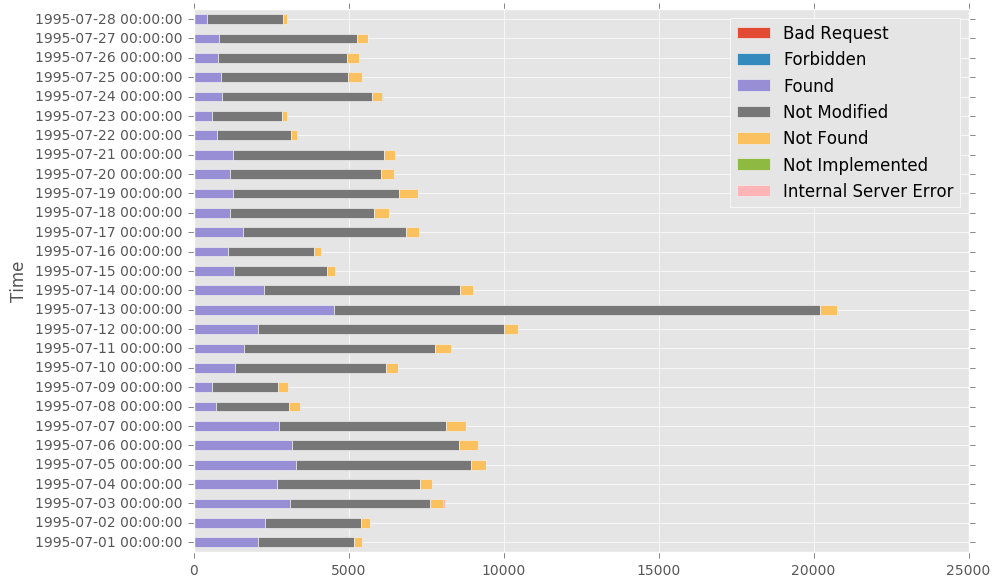

In [50]:
# Expected output

But there is a better way to receive statistics about different groups of values. Here we group our data by *Status* by using `.groupby()`

In [27]:
# Fill code here
grouped_status = df.groupby('Status')
grouped_status.head(2)

Status         b                                IP  \
Time                                                                      
1995-07-01 00:00:01     200  0.005956                      199.72.81.55   
1995-07-01 00:00:06     200  0.003800              unicomp6.unicomp.net   
1995-07-01 00:00:11     304  0.000000                burger.letters.com   
1995-07-01 00:00:12     304  0.000000                burger.letters.com   
1995-07-01 00:01:06     302  0.000105                    205.189.154.54   
1995-07-01 00:01:12     404       NaN           dd15-062.compuserve.com   
1995-07-01 00:01:53     302  0.000105         remote27.compusmart.ab.ca   
1995-07-01 00:10:19     404       NaN                 netport-27.iu.net   
1995-07-02 00:55:38     403       NaN              pc0135.metrolink.net   
1995-07-02 16:22:21     403       NaN                    198.70.174.235   
1995-07-03 10:49:40     500  0.000000                      163.205.1.45   
1995-07-03 10:49:41     500  0.000000                      163.205.1.45   
1995-07-05 16:22:12     501       NaN                       134.57.9.77   
1995-07-07 16:21:15     501       NaN           ix-tf1-18.ix.netcom.com   
1995-07-10 16:45:50     400       NaN  klothos.crl.research.digital.com   
1995-07-20 07:34:34     400       NaN              firewall.dfw.ibm.com   

                                                               Request  
Time                                                                    
1995-07-01 00:00:01                      GET /history/apollo/ HTTP/1.0  
1995-07-01 00:00:06                   GET /shuttle/countdown/ HTTP/1.0  
1995-07-01 00:00:11       GET /shuttle/countdown/liftoff.html HTTP/1.0  
1995-07-01 00:00:12            GET /images/NASA-logosmall.gif HTTP/1.0  
1995-07-01 00:01:06    GET /cgi-bin/imagemap/countdown?99,176 HTTP/1.0  
1995-07-01 00:01:12  GET /news/sci.space.shuttle/archive/sci-space-...  
1995-07-01 00:01:53   GET /cgi-bin/imagemap/countdown?102,174 HTTP/1.0  
1995-07-01 00:10:19                 GET /pub/winvn/readme.txt HTTP/1.0  
1995-07-02 00:55:38  GET /shuttle/missions/sts-71/images/images/eks...  
1995-07-02 16:22:21  GET /software/winvn/winvn.html/winvn.gif HTTP/1.0  
1995-07-03 10:49:40               GET /cgi-bin/geturlstats.pl HTTP/1.0  
1995-07-03 10:49:41               GET /cgi-bin/geturlstats.pl HTTP/1.0  
1995-07-05 16:22:12                            POST /ksc.html HTTP/1.0  
1995-07-07 16:21:15                                    POST / HTTP/1.0  
1995-07-10 16:45:50                                                   
1995-07-20 07:34:34                           1/history/apollo/images/

Data are now rearranged in to several groups, each corresponding to a certain value of *Status* (here, only the first two values of every group are shown):

In [26]:
grouped_status.head(2)

Status         b                                IP  \
Time                                                                      
1995-07-01 00:00:01     200  0.005956                      199.72.81.55   
1995-07-01 00:00:06     200  0.003800              unicomp6.unicomp.net   
1995-07-01 00:00:11     304  0.000000                burger.letters.com   
1995-07-01 00:00:12     304  0.000000                burger.letters.com   
1995-07-01 00:01:06     302  0.000105                    205.189.154.54   
1995-07-01 00:01:12     404       NaN           dd15-062.compuserve.com   
1995-07-01 00:01:53     302  0.000105         remote27.compusmart.ab.ca   
1995-07-01 00:10:19     404       NaN                 netport-27.iu.net   
1995-07-02 00:55:38     403       NaN              pc0135.metrolink.net   
1995-07-02 16:22:21     403       NaN                    198.70.174.235   
1995-07-03 10:49:40     500  0.000000                      163.205.1.45   
1995-07-03 10:49:41     500  0.000000                      163.205.1.45   
1995-07-05 16:22:12     501       NaN                       134.57.9.77   
1995-07-07 16:21:15     501       NaN           ix-tf1-18.ix.netcom.com   
1995-07-10 16:45:50     400       NaN  klothos.crl.research.digital.com   
1995-07-20 07:34:34     400       NaN              firewall.dfw.ibm.com   

                                                               Request  
Time                                                                    
1995-07-01 00:00:01                      GET /history/apollo/ HTTP/1.0  
1995-07-01 00:00:06                   GET /shuttle/countdown/ HTTP/1.0  
1995-07-01 00:00:11       GET /shuttle/countdown/liftoff.html HTTP/1.0  
1995-07-01 00:00:12            GET /images/NASA-logosmall.gif HTTP/1.0  
1995-07-01 00:01:06    GET /cgi-bin/imagemap/countdown?99,176 HTTP/1.0  
1995-07-01 00:01:12  GET /news/sci.space.shuttle/archive/sci-space-...  
1995-07-01 00:01:53   GET /cgi-bin/imagemap/countdown?102,174 HTTP/1.0  
1995-07-01 00:10:19                 GET /pub/winvn/readme.txt HTTP/1.0  
1995-07-02 00:55:38  GET /shuttle/missions/sts-71/images/images/eks...  
1995-07-02 16:22:21  GET /software/winvn/winvn.html/winvn.gif HTTP/1.0  
1995-07-03 10:49:40               GET /cgi-bin/geturlstats.pl HTTP/1.0  
1995-07-03 10:49:41               GET /cgi-bin/geturlstats.pl HTTP/1.0  
1995-07-05 16:22:12                            POST /ksc.html HTTP/1.0  
1995-07-07 16:21:15                                    POST / HTTP/1.0  
1995-07-10 16:45:50                                                   
1995-07-20 07:34:34                           1/history/apollo/images/

We can count the number of values in each group:

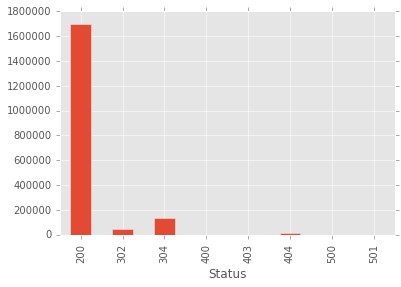

In [28]:
# Fill code here
grouped_status.size().plot(kind='bar')

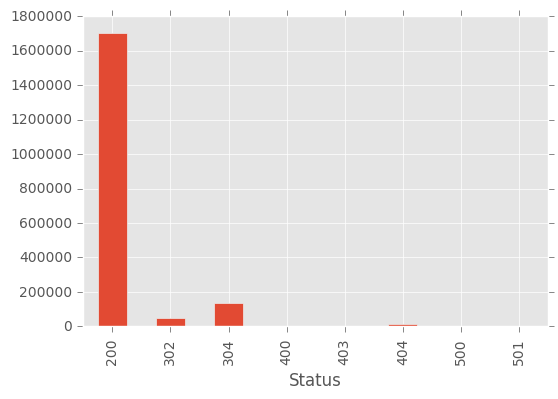

In [54]:
# Expected output

## Part 5 : IPs

Now I want to group by IPs and calculate how many requests we get from each of them: 

In [29]:
# Fill code here

ips = df.groupby('IP').size()
# ips.head()

81982


Show top 10 IPs and number of requests as a bar chart.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


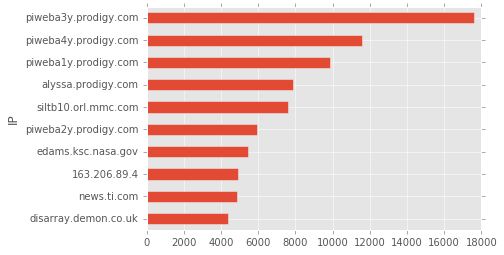

In [30]:
# Fill code here
ips.sort()
ips[-10:].plot(kind='barh')

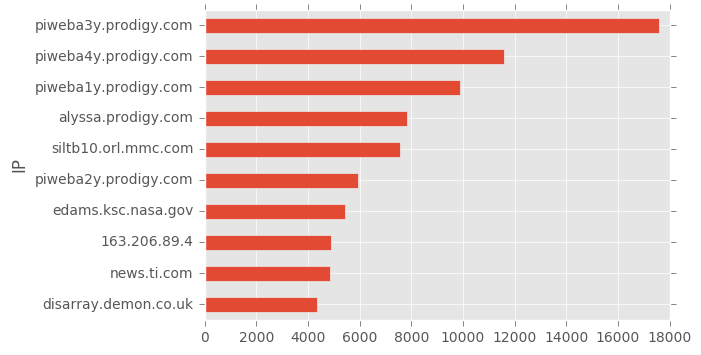

In [53]:
# Expected output

I just want to have a nice table with the top 10 IPs, so I convert them to Data Frame :)

In [31]:
# Fill code here
ips_fd = DataFrame({'Number of requests':ips[-10:]})
ips_fd = ips_fd.sort(columns='Number of requests')
ips_fd


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Number of requests
IP                                      
disarray.demon.co.uk                4353
news.ti.com                         4863
163.206.89.4                        4906
edams.ksc.nasa.gov                  5434
piweba2y.prodigy.com                5922
siltb10.orl.mmc.com                 7573
alyssa.prodigy.com                  7852
piweba1y.prodigy.com                9868
piweba4y.prodigy.com               11591
piweba3y.prodigy.com               17572

In [55]:
# Expected output

Number of requests
IP                                      
disarray.demon.co.uk                4353
news.ti.com                         4863
163.206.89.4                        4906
edams.ksc.nasa.gov                  5434
piweba2y.prodigy.com                5922
siltb10.orl.mmc.com                 7573
alyssa.prodigy.com                  7852
piweba1y.prodigy.com                9868
piweba4y.prodigy.com               11591
piweba3y.prodigy.com               17571

We also can group by both *IP* and *Status*. Try and produce the bar chart as shown below.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


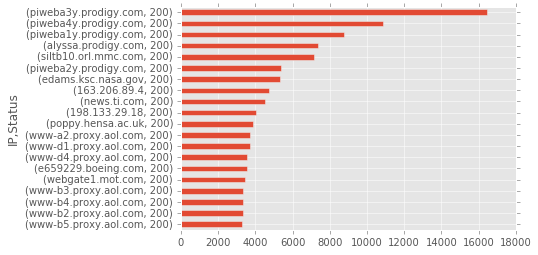

In [32]:
# Fill code here
ips_status = df.groupby(['IP', 'Status']).size()

ips_status.sort()
ips_status[-20:].plot(kind='barh')

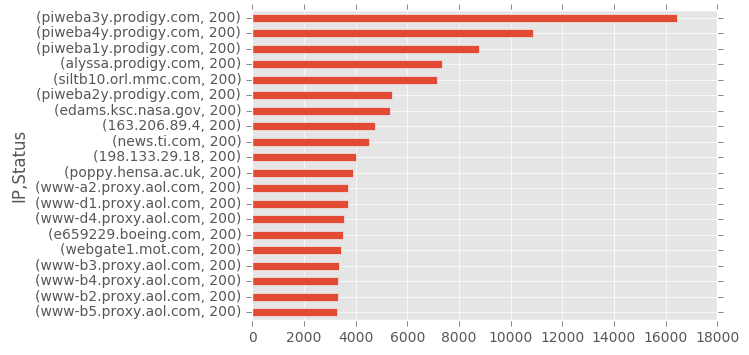

In [57]:
# Expected output

## Part 6: Geographical information

In this part, you will further analyze the log file by cross-checking the ip/hostname with GeoIP data. This will let you know the geographical origin of the request.

You will be 'pygeoip' package, which can be easily installed by `conda install -c chuongdo pygeoip=0.3.1`

In [33]:
import pygeoip
gi = pygeoip.GeoIP('data/GeoIP.dat', pygeoip.MEMORY_CACHE)
Geo_log = open('data/GeoIP.dat').readlines()
Geo_log = Geo_log[:100]
geo_ips = ips[:100]
# new_gi = pygeoip.GeoIP(Geo_log, pygeoip.MEMORY_CACHE)



One of the challenges for this part is that some entries are not the IP addresses but hostnames. Here is excerpt from pygeoip API. You can use these function to get the country code.

```
country_code_by_addr(addr) -- Returns 2-letter country code (e.g. US) from IP address.
    Parameters:	addr – IP address (e.g. 203.0.113.30)

country_code_by_name(hostname) -- Returns 2-letter country code (e.g. US) from hostname.
    Parameters:	hostname – Hostname (e.g. example.com)
```

** Caution: Looking up IP addresses can be extremely slow. It's okay to do this on a subset of data **

In [34]:
# Fill code here
import re

ip_pattern = r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$"

def country_code(s):
    match = re.search(ip_pattern, s)
    if match:
        return gi.country_code_by_addr(s)
    return gi.country_code_by_name(s)

Create Data Frame similar to what shown below

In [60]:
# Fill code here

grouped_ip = df.groupby('IP')
ips = grouped_ip.count()
ips = ips.rename(columns={'Request': 'number'})
ips = ips.drop(['b', 'Status'], axis=1)
sub_ips = ips.sample(n=1000)
# print sub_ips
print len(sub_ips)

1000


In [61]:
ip_data = {}
print 'boss'
for index in sub_ips.index:
    print index
    try:
        code = country_code(index)
    except:
        code = 'UNKNOWN'
    finally:
        ip_data[index] = code
        


boss
ix-la3-19.ix.netcom.com
194.90.13.91
wuzza.harvard.edu
j3.ptl4.jaring.my
ad05-025.compuserve.com
mac6326.gator.math.iastate.edu
case.cyberspace.com
mach1.wlu.ca
uctck.bxw.uc.edu
pipe3.h1.usa.pipeline.com
131.110.49.146
dawn14.cs.berkeley.edu
dialup72.achilles.net
slip144-213.ut.nl.ibm.net
unknown-70-206.clorox.com
dial4-20.midwest.net
toronto.cbc.ca
ccc016.canuck.com
n226.fred.ifas.ufl.edu
141.102.80.71
ad12-013.compuserve.com
140.198.71.38
sol.upc.es
tip45.corp.harris.com
rvr0141.deltanet.com
dd07-005.compuserve.com
svr1.daiyon-jhs.maebashi.gunma.jp
ix-dc6-24.ix.netcom.com
annex12-64.dial.umd.edu
r-anderson.formed.gla.ac.uk
velcro9.zip.com.au
p25.boulder-2.dialup.csn.net
162.6.9.17
ip31.newark.nj.interramp.com
ix-lb7-15.ix.netcom.com
ppp402.st.rim.or.jp
dialup15.wdbg.va.qnet.com
147.150.129.24
kokanee.cs.ubc.ca
p47.superlink.net
natalie.cs.rau.lv
141.42.25.52
sys_robi.mednuc.usherb.ca
a1p26.connect.net
v1l16.victo1-gw.login.net
topgun.seanet.com
acm23-5.acs.ttu.edu
nw7-1rs.demon.

In [62]:
sub_ips['code'] = ''

for index, row in sub_ips.iterrows():
    sub_ips.set_value(index, 'code', ip_data[index])
    
sub_ips.head()

number     code
IP                                      
ix-la3-19.ix.netcom.com       6  UNKNOWN
194.90.13.91                  2       IL
wuzza.harvard.edu            33  UNKNOWN
j3.ptl4.jaring.my             6  UNKNOWN
ad05-025.compuserve.com      40  UNKNOWN

In [73]:
# Expected output

code  number
IP                                         
b10rn101.remote.ingr.com    UNKNOWN       1
194.21.12.40                     IT       1
ccas-slip2.saicyt.net.ve    UNKNOWN       1
stanton-1-1.cloverleaf.com  UNKNOWN       1
kosh-141b.berkeley.edu      UNKNOWN       1

Group by country code:

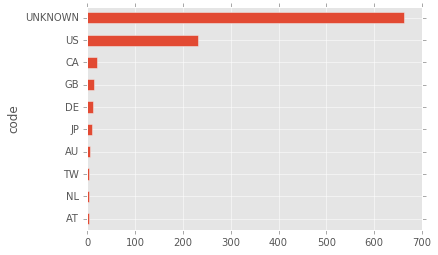

In [63]:
# Fill code here
country = sub_ips.groupby('code').size()
country.sort_values(inplace=True)
# ff = country.Number.agg('sum').copy()
country[-10:].plot(kind='barh')


# grouped_country = sub_ips.groupby('code').size()
# grouped_country.sort_values(inplace=True)
# grouped_country[-10:].plot(kind='barh')

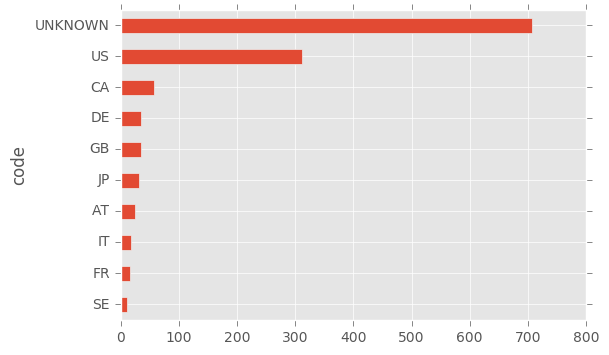

In [75]:
# Expected output

Credit: This exercise is based on a notebook by Nikolay Koldunov [koldunov.net](http://koldunov.net)